In [1]:
import numpy as np
train_image_folder = "./data"
image_paths         = ['/2008_000954.jpg','/2008_000326.jpg',"/2008_000005.jpg",'/2008_000164.jpg','/2008_000240.jpg']
image_path =    [train_image_folder + i for i in image_paths]
# TRAINED_WEIGHTS   = 'data\trained_weights.h5'

TRAINED_WEIGHTS   = './data/trained_weights.h5'
ANCHORS = np.array([1.07709888,1.78171903,2.71054693, 5.12469308, 10.47181473, 10.09646365, 5.48531347,8.11011331]) 
IMAGE_H, IMAGE_W  = 416, 416
GRID_H,  GRID_W   = 13 , 13
TRUE_BOX_BUFFER   = 50
CLASS             = 20
BOX               = 4




In [2]:
%run model_r.ipynb
model, true_boxes = define_YOLOv2(IMAGE_H,IMAGE_W,GRID_H,GRID_W,TRUE_BOX_BUFFER,BOX,CLASS,trainable=False)
model.load_weights(TRAINED_WEIGHTS)

Using TensorFlow backend.


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:101: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


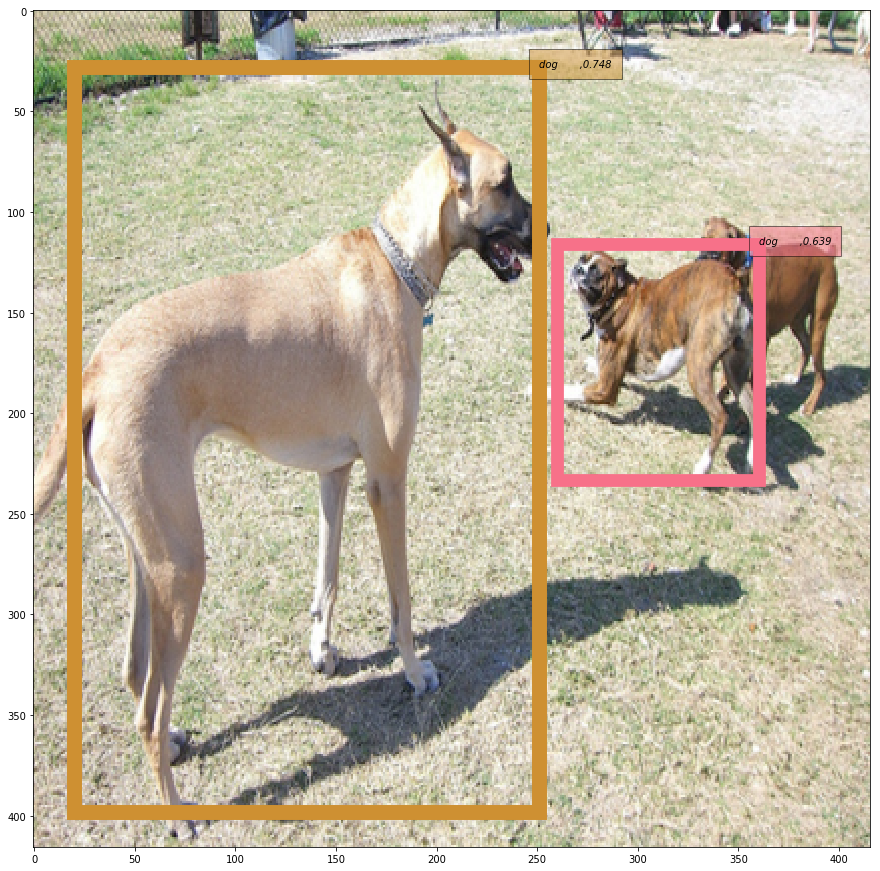

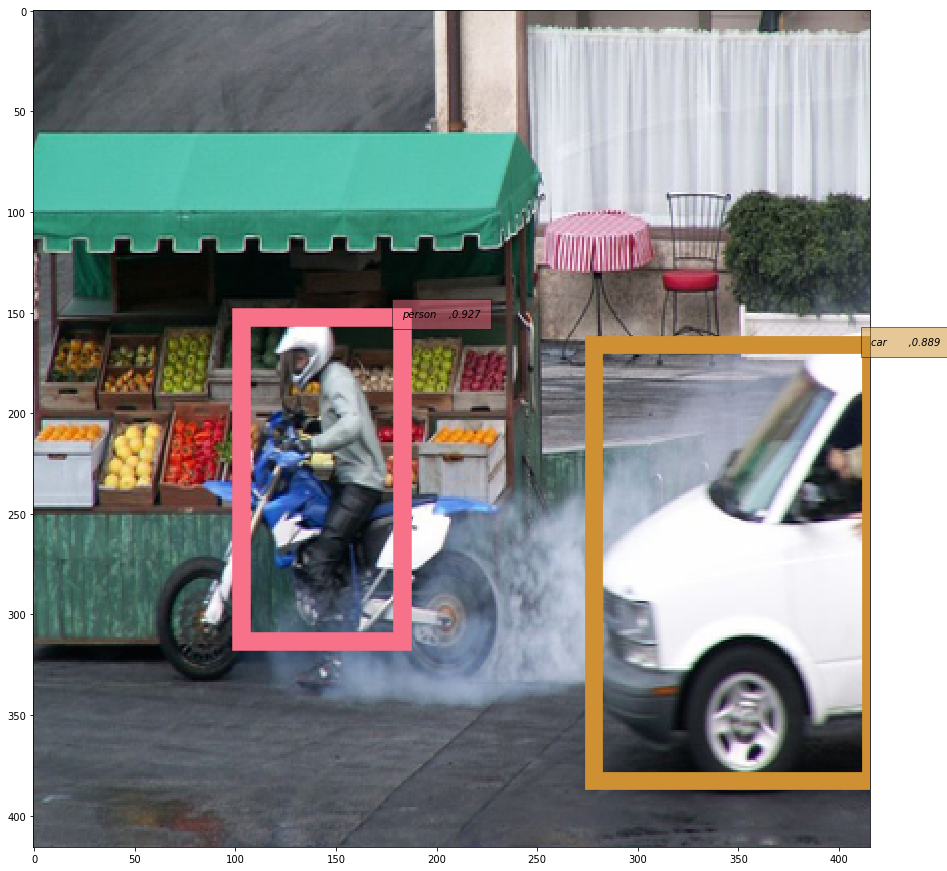

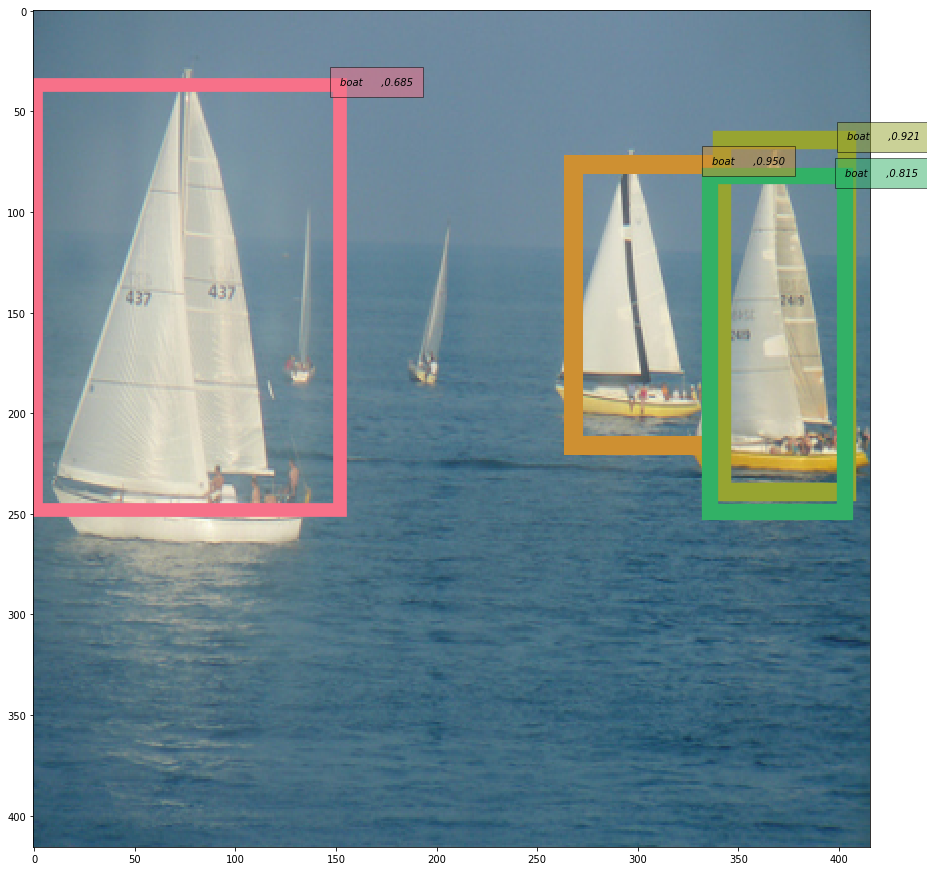

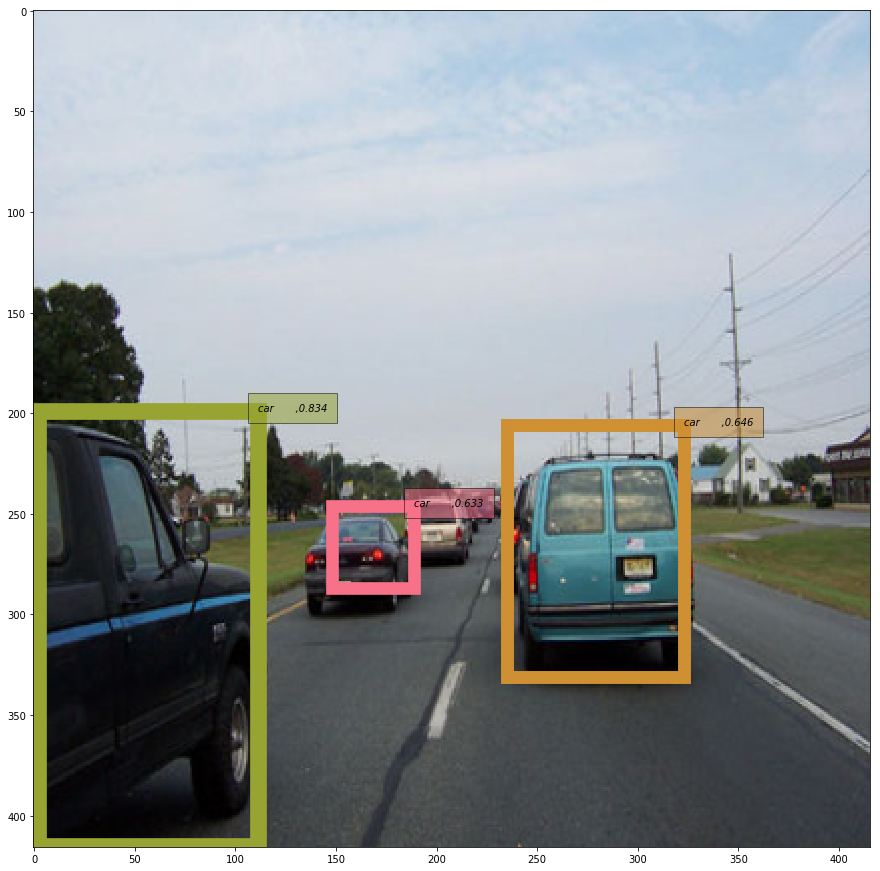

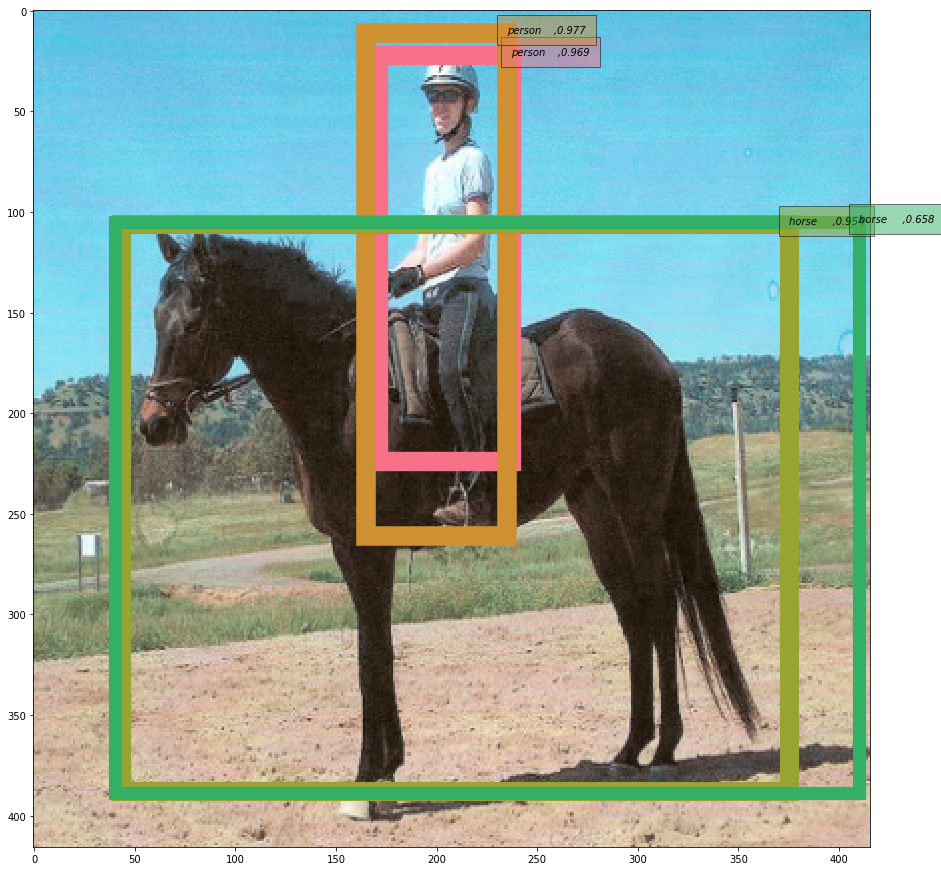

In [3]:
%run data_r.ipynb # for loading ImageReader
%run output_r.ipynb # find output boxes  and other stuff
%matplotlib inline
import copy 
import matplotlib.pyplot as plt
dummy_array = np.zeros((1,1,1,1,TRUE_BOX_BUFFER,4))
outputRescaler = OutputRescaler(ANCHORS=ANCHORS)
imageReader = ImageReader(IMAGE_H=IMAGE_H,IMAGE_W=IMAGE_W, norm=lambda image : image / 255.)
obj_threshold_h  = 0.6
for i in image_path:
    out            = imageReader.fit(i)
    X_test         = np.expand_dims(out,0)
    y_pred         = model.predict([X_test,dummy_array])
    netout         = copy.deepcopy(y_pred[0])
    netout_scale   = outputRescaler.fit(netout)
    pred_high_tsh  = find_high_class_probability_bbox(netout_scale,obj_threshold_h)
    
    draw_boxes(X_test[0],pred_high_tsh,LABELS,verbose=False)
    plt.show()

